In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [81]:
df = pd.read_csv('hr.csv')

In [82]:
df.head()

,Age,Attrition,Attrition Code,BusinessTravel,Business Travel Code,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,No,0,Non-Travel,0,105,Research & Development,9,3,Life Sciences,...,3,80,0,21,3,2,6,0,1,3
1,44,No,0,Non-Travel,0,111,Research & Development,17,3,Life Sciences,...,4,80,0,6,3,3,0,0,0,0
2,50,No,0,Non-Travel,0,145,Sales,1,3,Life Sciences,...,1,80,1,19,3,3,18,7,0,13
3,30,No,0,Non-Travel,0,111,Research & Development,9,3,Medical,...,3,80,2,12,4,3,12,9,6,10
4,37,No,0,Non-Travel,0,142,Sales,9,4,Medical,...,4,80,1,9,6,3,9,5,7,7


In [83]:
df.describe()

,Age,Attrition Code,Business Travel Code,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender Code,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


ValueError: cannot convert float NaN to integer

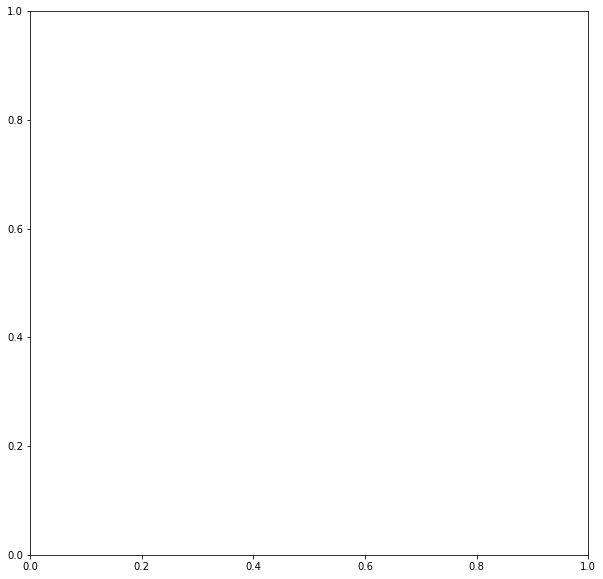

In [296]:
# Makes a correlation matrix

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation


def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, color, size):    
    fig, ax = plt.subplots(figsize = (10,10))
    
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s'
    ) 
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
columns = ['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'Gender Code', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'OverTime Code', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    color=corr['value'],
    size=corr['value'].abs()
)

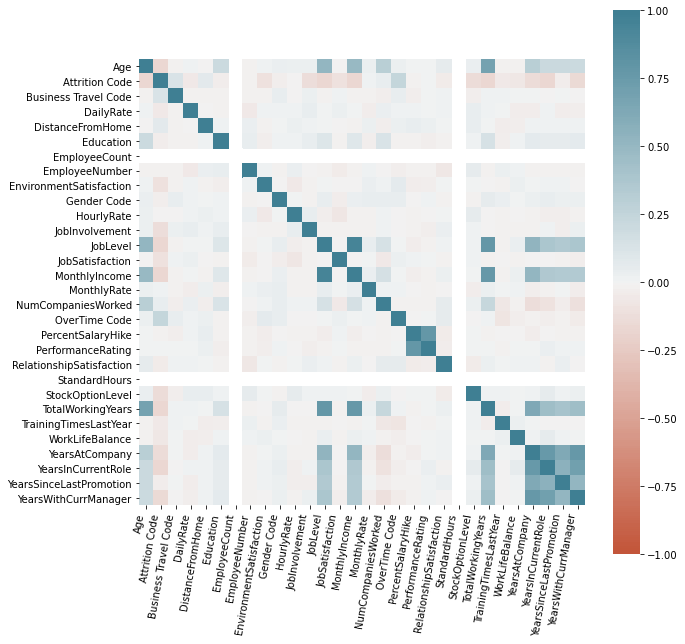

In [256]:
corr = df.corr()
plt.figure(figsize = (10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=80,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    horizontalalignment='right'
);

Text(0.5, 1.0, 'Monthly Income Wise YearsAtCompany Distribution')

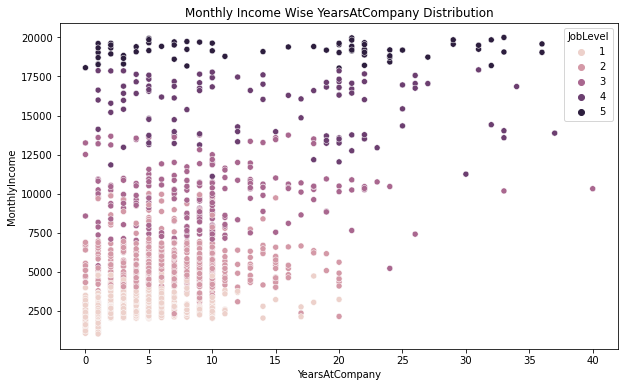

In [85]:
plt.figure(figsize=(10, 6))
children5 = df['JobLevel'].value_counts()
sns.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", hue='JobLevel', data = df)
plt.title('Monthly Income Wise YearsAtCompany Distribution')

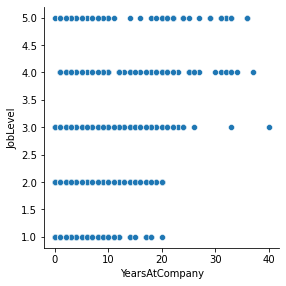

In [86]:
sns.pairplot(df, x_vars=['YearsAtCompany'], 
             y_vars='JobLevel', height=4, aspect=1, kind='scatter')
plt.show()

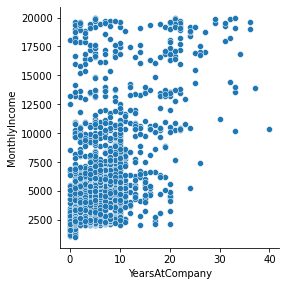

In [87]:
sns.pairplot(df, x_vars=['YearsAtCompany'], 
             y_vars='MonthlyIncome', height=4, aspect=1, kind='scatter')
plt.show()

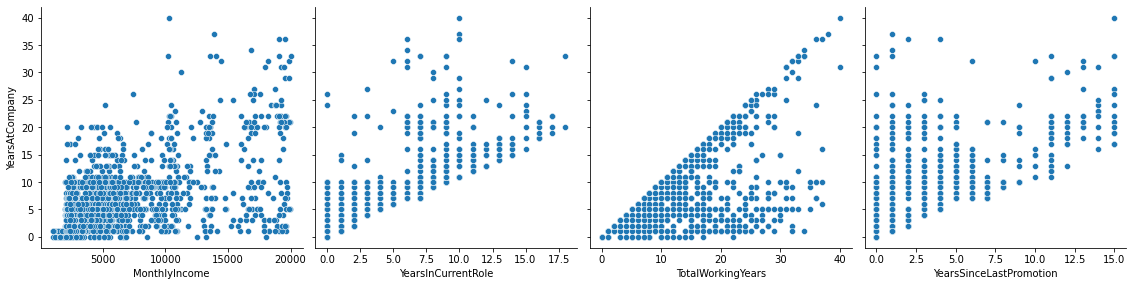

In [154]:
sns.pairplot(df, x_vars=['MonthlyIncome', 'YearsInCurrentRole', 'TotalWorkingYears','YearsSinceLastPromotion'], 
             y_vars='YearsAtCompany', height=4, aspect=1, kind='scatter')
plt.show()

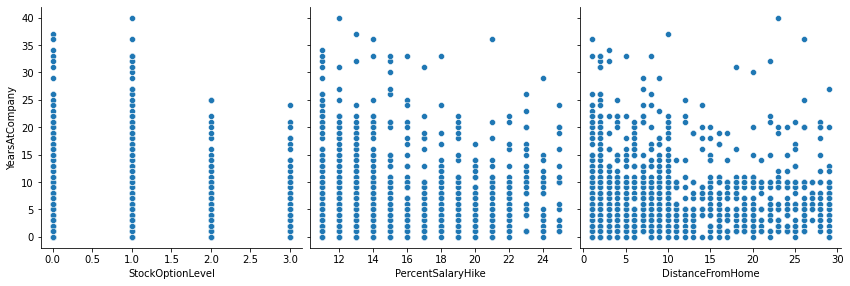

In [149]:
sns.pairplot(df, x_vars=['StockOptionLevel', 'PercentSalaryHike','DistanceFromHome'], 
             y_vars='YearsAtCompany', height=4, aspect=1, kind='scatter')
plt.show()

In [222]:
df.columns.values

array(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'Gender Code', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'OverTime Code', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [90]:
# Creating X and y, y2 for YearsAtCompany regression
y = df['MonthlyIncome']
y2 = df['YearsSinceLastPromotion']

X = df['YearsAtCompany']

In [264]:
y3 = df['YearsWithCurrManager']
y4 = df['TotalWorkingYears']
y5 = df['NumCompaniesWorked']


In [265]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y3_train, y3_test = train_test_split(X, y3, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y4_train, y4_test = train_test_split(X, y4, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train, X_test, y5_train, y5_test = train_test_split(X, y5, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [266]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [267]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
lr2 = sm.OLS(y2_train, X_train_sm).fit()
lr3 = sm.OLS(y3_train, X_train_sm).fit()
lr4 = sm.OLS(y4_train, X_train_sm).fit()
lr5 = sm.OLS(y5_train, X_train_sm).fit()

# Printing the parameters
lr.params

const             3659.871838
YearsAtCompany     401.109586
dtype: float64

In [268]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     441.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           7.49e-82
Time:                        13:41:32   Log-Likelihood:                -9978.1
No. Observations:                1029   AIC:                         1.996e+04
Df Residuals:                    1027   BIC:                         1.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3659.8718    184.679     19.817      0.000    3297.480    4022.264
YearsAtCompany   401.1096     19.085     21.017      0.000     363.660     438.560
==============================================================================
Omnibus:                      262.657   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.636
Skew:                           1.395   Prob(JB):                    2.05e-129
Kurtosis:                       5.458   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     YearsSinceLastPromotion   R-squared:                       0.382
Model:                                 OLS   Adj. R-squared:                  0.381
Method:                      Least Squares   F-statistic:                     633.6
Date:                     Fri, 05 Nov 2021   Prob (F-statistic):          2.74e-109
Time:                             13:41:33   Log-Likelihood:                -2443.1
No. Observations:                     1029   AIC:                             4890.
Df Residuals:                         1027   BIC:                             4900.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0498      0.122     -0.408      0.683      -0.289       0.190
YearsAtCompany     0.3173      0.013     25.172      0.000       0.293       0.342
==============================================================================
Omnibus:                       82.915   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.652
Skew:                           0.477   Prob(JB):                     1.79e-41
Kurtosis:                       4.862   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     YearsWithCurrManager   R-squared:                       0.588
Model:                              OLS   Adj. R-squared:                  0.588
Method:                   Least Squares   F-statistic:                     1467.
Date:                  Fri, 05 Nov 2021   Prob (F-statistic):          4.38e-200
Time:                          13:41:34   Log-Likelihood:                -2338.3
No. Observations:                  1029   AIC:                             4681.
Df Residuals:                      1027   BIC:                             4690.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0222      0.110      9.280      0.000       0.806       1.238
YearsAtCompany     0.4360      0.011     38.302      0.000       0.414       0.458
==============================================================================
Omnibus:                      106.828   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.427
Skew:                          -0.421   Prob(JB):                     1.13e-92
Kurtosis:                       6.028   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalWorkingYears   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     790.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):          1.78e-129
Time:                        13:00:00   Log-Likelihood:                -3291.6
No. Observations:                1029   AIC:                             6587.
Df Residuals:                    1027   BIC:                             6597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6011      0.278     20.133      0.000       5.055       6.147
YearsAtCompany     0.8084      0.029     28.120      0.000       0.752       0.865
==============================================================================
Omnibus:                      402.119   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.434
Skew:                           1.963   Prob(JB):                    2.77e-285
Kurtosis:                       6.893   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     NumCompaniesWorked   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.83
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           0.000358
Time:                        13:41:41   Log-Likelihood:                -2390.7
No. Observations:                1029   AIC:                             4785.
Df Residuals:                    1027   BIC:                             4795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0194      0.116     26.050      0.000       2.792       3.247
YearsAtCompany    -0.0429      0.012     -3.582      0.000      -0.066      -0.019
==============================================================================
Omnibus:                      131.337   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.500
Skew:                           1.036   Prob(JB):                     8.64e-41
Kurtosis:                       3.080   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

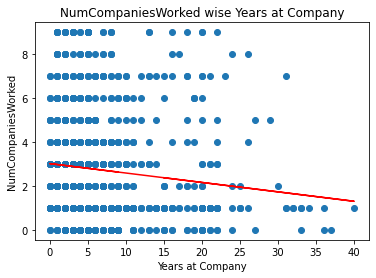

In [272]:
plt.title("NumCompaniesWorked wise Years at Company")
plt.ylabel('NumCompaniesWorked')
plt.xlabel("Years at Company")


plt.scatter(X_train, y5_train)
plt.plot(X_train, 3.0194 + -0.0429*X_train, 'r')
plt.show()

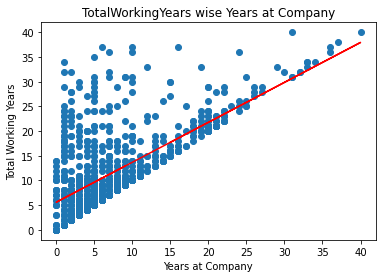

In [166]:
plt.title("TotalWorkingYears wise Years at Company")
plt.ylabel("Total Working Years")
plt.xlabel("Years at Company")


plt.scatter(X_train, y4_train)
plt.plot(X_train, 5.6011 + 0.8084*X_train, 'r')
plt.show()

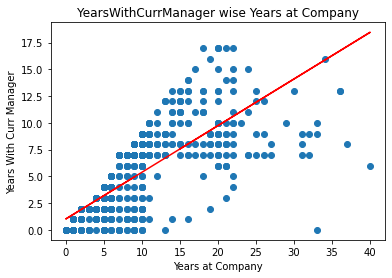

In [126]:
plt.title("YearsWithCurrManager wise Years at Company")
plt.ylabel("Years With Curr Manager")
plt.xlabel("Years at Company")


plt.scatter(X_train, y3_train)
plt.plot(X_train, 1.0222 + 0.4360*X_train, 'r')
plt.show()

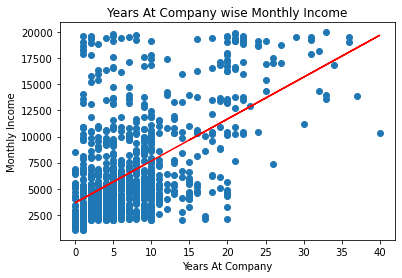

In [127]:
# Visualizing the regression line

plt.title("Years At Company wise Monthly Income")
plt.ylabel("Monthly Income")
plt.xlabel("Years At Company")


plt.scatter(X_train, y_train)
plt.plot(X_train, 3659.8718 + 401.1096*X_train, 'r')
plt.show()

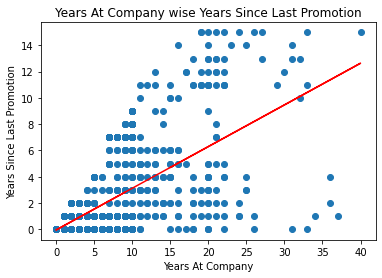

In [128]:
# Visualizing the regression line
plt.title("Years At Company wise Years Since Last Promotion")
plt.ylabel("Years Since Last Promotion")
plt.xlabel("Years At Company")

plt.scatter(X_train, y2_train)
plt.plot(X_train, -0.0498 + 0.3173*X_train, 'r')
plt.show()


<AxesSubplot:ylabel='Frequency'>

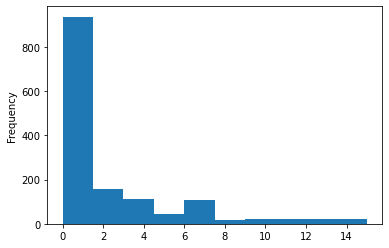

In [129]:
df['YearsSinceLastPromotion'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

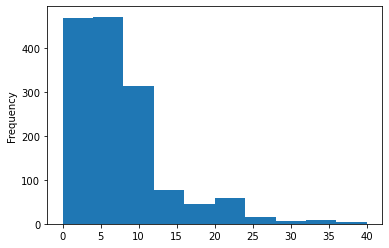

In [33]:
df['YearsAtCompany'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

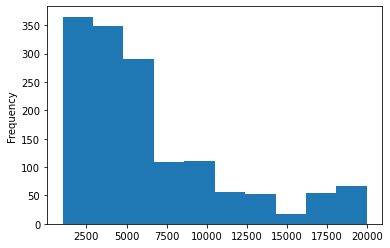

In [34]:
df['MonthlyIncome'].plot(kind='hist')

In [36]:
df.columns


Index(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'Gender Code', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'OverTime Code', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

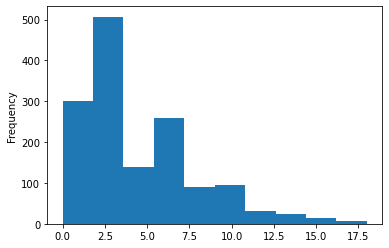

In [45]:

df['YearsInCurrentRole'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

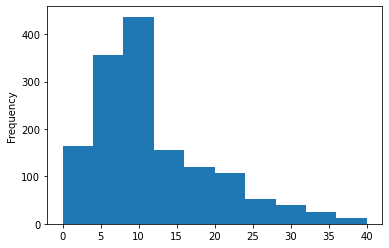

In [173]:
df['TotalWorkingYears'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

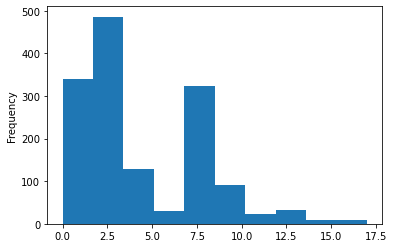

In [177]:
df['YearsWithCurrManager'].plot(kind='hist')

In [178]:
df.columns

Index(['Age', 'Attrition', 'Attrition Code', 'BusinessTravel',
       'Business Travel Code', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'Gender Code', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'OverTime Code', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

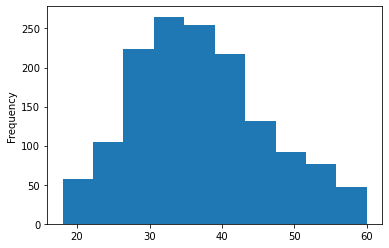

In [182]:
df['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

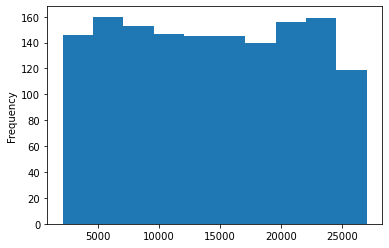

In [193]:
df['MonthlyRate'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

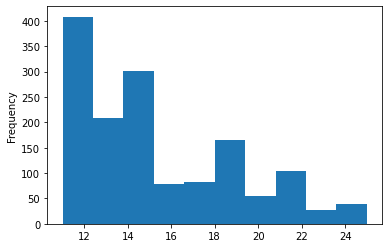

In [194]:
df['PercentSalaryHike'].plot(kind='hist')

In [195]:
df.describe()

,Age,Attrition Code,Business Travel Code,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender Code,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:ylabel='Frequency'>

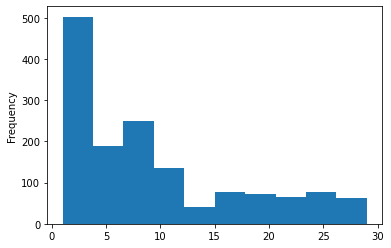

In [197]:
df['DistanceFromHome'].plot(kind='hist')

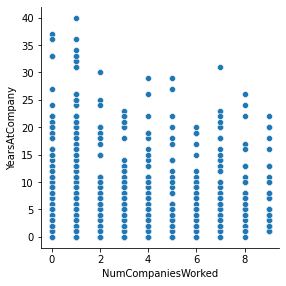